Hello William!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you so much for the feedback, I appreacaite it! I should have double checked before submitting. Thanks! 
</div>


Title: Sprint 17
introduction: The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

Interconnect's services
Interconnect mainly provides two types of services:

Landline communication. The telephone can be connected to several lines simultaneously.
Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.
Some other services the company provides include:

Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
A dedicated technical support line (TechSupport)
Cloud file storage and data backup (OnlineBackup)
TV streaming (StreamingTV) and a movie directory (StreamingMovies)
The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as date
import scipy.stats as stats
import math as math
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
import csv
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
#import data
df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')


In [3]:
# display the data 
df_contract.info()
df_contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
# check data for nulls and duplicated rows
print('has duplicates: '+str(df_contract.duplicated().any()))
df_contract.isnull().sum()

has duplicates: False


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [5]:
# display the data 
df_internet.info()
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [6]:
# check data for nulls and duplicated rows
print('has duplicates: '+str(df_internet.duplicated().any()))
df_internet.isnull().sum()

has duplicates: False


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [7]:
# display the data 
df_personal.info()
df_personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [8]:
# check dat for nulls and duplicated rows
print('has duplicates: '+str(df_personal.duplicated().any()))
df_personal.isnull().sum()

has duplicates: False


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [9]:
# display the data 
df_phone.info()
df_phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [10]:
# check dat for nulls and duplicated rows
print('has duplicates: '+str(df_phone.duplicated().any()))
df_phone.isnull().sum()

has duplicates: False


customerID       0
MultipleLines    0
dtype: int64

conclusions: no nulls or duplicate rows in any dataframe.

In [11]:
# merge dataframes
df = pd.merge(df_contract, df_internet, on='customerID',how='left')
df = pd.merge(df, df_personal, on='customerID',how='left')
df = pd.merge(df, df_phone, on='customerID',how='left')
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

In [12]:
df['InternetService'] = df['InternetService'].fillna('none')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('No')
df['OnlineBackup'] = df['OnlineBackup'].fillna('No')
df['DeviceProtection'] = df['DeviceProtection'].fillna('No')
df['TechSupport'] = df['TechSupport'].fillna('No')
df['StreamingTV'] = df['StreamingTV'].fillna('No')
df['StreamingMovies' ] = df['StreamingMovies'].fillna('No')
df['MultipleLines' ] = df['MultipleLines'].fillna('No')

df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
dtype: int64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It seems you lost a lot of data because of the wrong join type

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct. Good job!

</div>

In [13]:
#check for nulls
df


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,No
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


In [14]:
# convert target to binary
df['EndDate'] = df['EndDate'].replace('No', 0)
df['EndDate'] = df['EndDate'].apply(lambda x: 0 if x == 0 else 1)



In [15]:
# add month year and day column for begin date.
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

# Extract month, day, and year
df['month'] = df['BeginDate'].dt.month
df['day'] = df['BeginDate'].dt.day
df['year'] = df['BeginDate'].dt.year
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,month,day,year
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,Female,0,Yes,No,No,1,1,2020
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.5,DSL,Yes,...,No,No,Male,0,No,No,No,4,1,2017
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,Male,0,No,No,No,10,1,2019
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,No,Male,0,No,No,No,5,1,2016
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,Female,0,No,No,No,9,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,...,Yes,Yes,Male,0,Yes,Yes,Yes,2,1,2018
7039,2234-XADUH,2014-02-01,0,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,...,Yes,Yes,Female,0,Yes,Yes,Yes,2,1,2014
7040,4801-JZAZL,2019-03-01,0,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,...,No,No,Female,0,Yes,Yes,No,3,1,2019
7041,8361-LTMKD,2019-07-01,1,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,...,No,No,Male,1,Yes,No,Yes,7,1,2019


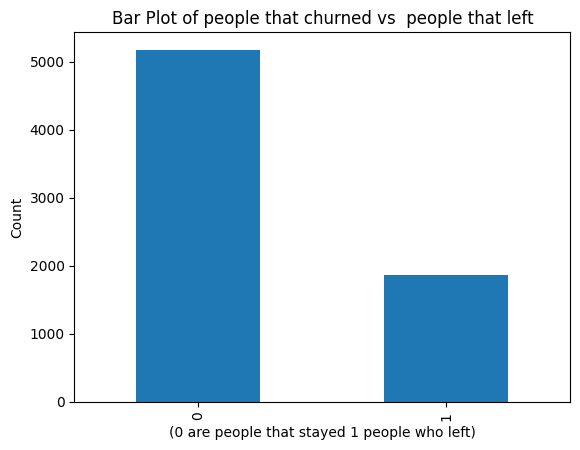

In [16]:
#count of target column
target_counts = df['EndDate'].value_counts()
target_counts.plot(kind='bar')
plt.xlabel('(0 are people that stayed 1 people who left)')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left')
plt.show()

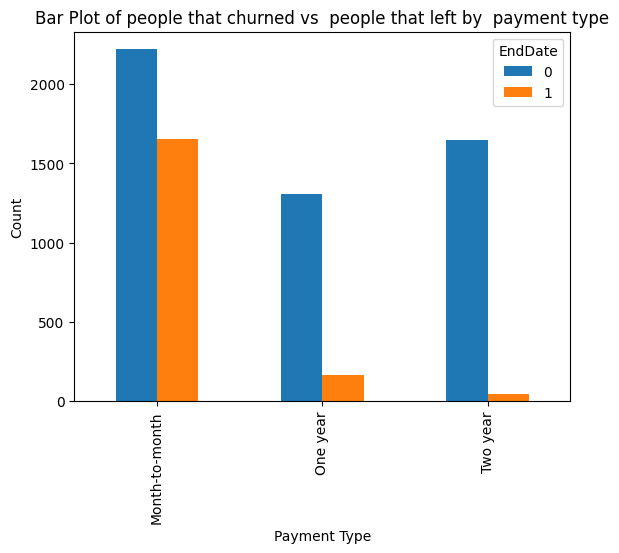

In [17]:
grouped = df.groupby('Type')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  payment type')
plt.show()

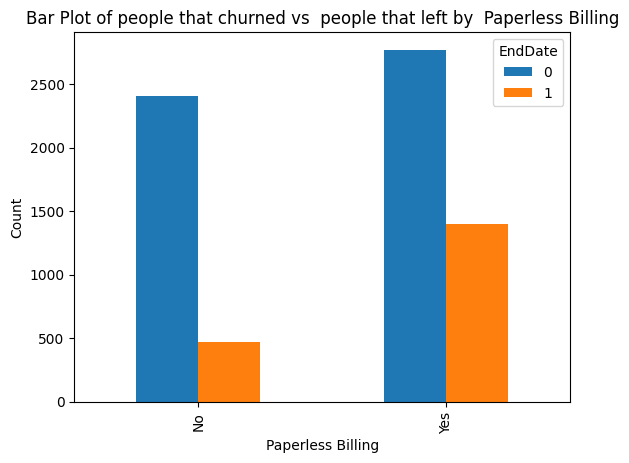

In [18]:
grouped = df.groupby('PaperlessBilling')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Paperless Billing')
plt.show()

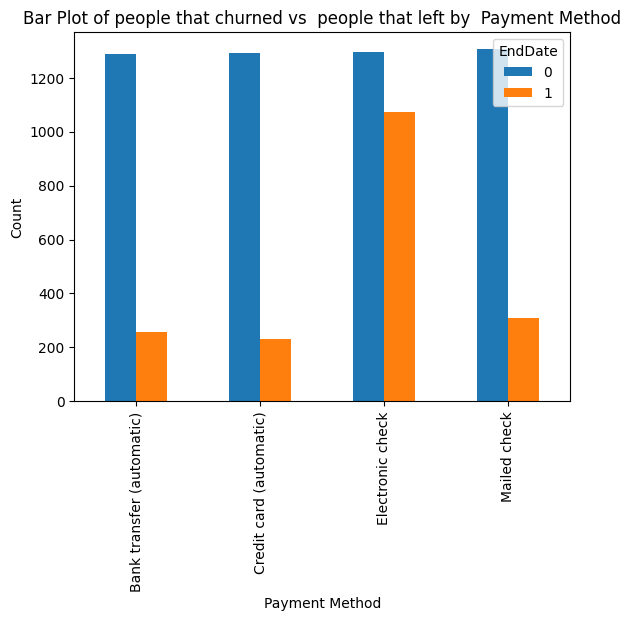

In [19]:
grouped = df.groupby('PaymentMethod')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Payment Method')
plt.show()

Text(0, 0.5, 'count')

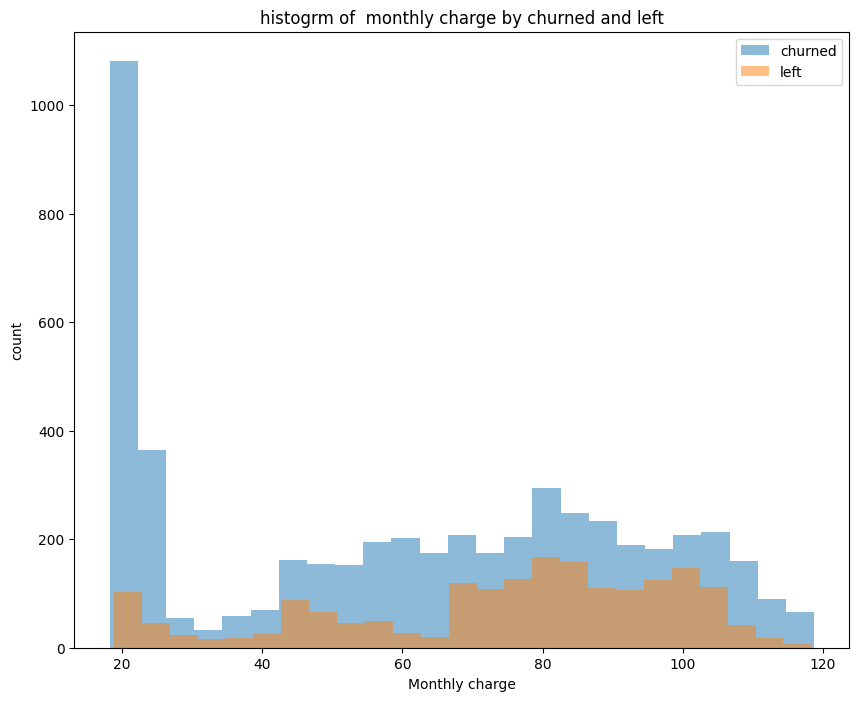

In [20]:
df.groupby('EndDate')['MonthlyCharges'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['churned', 'left'])
plt.title('histogrm of  monthly charge by churned and left')
plt.xlabel('Monthly charge')
plt.ylabel('count')

Text(0, 0.5, 'count')

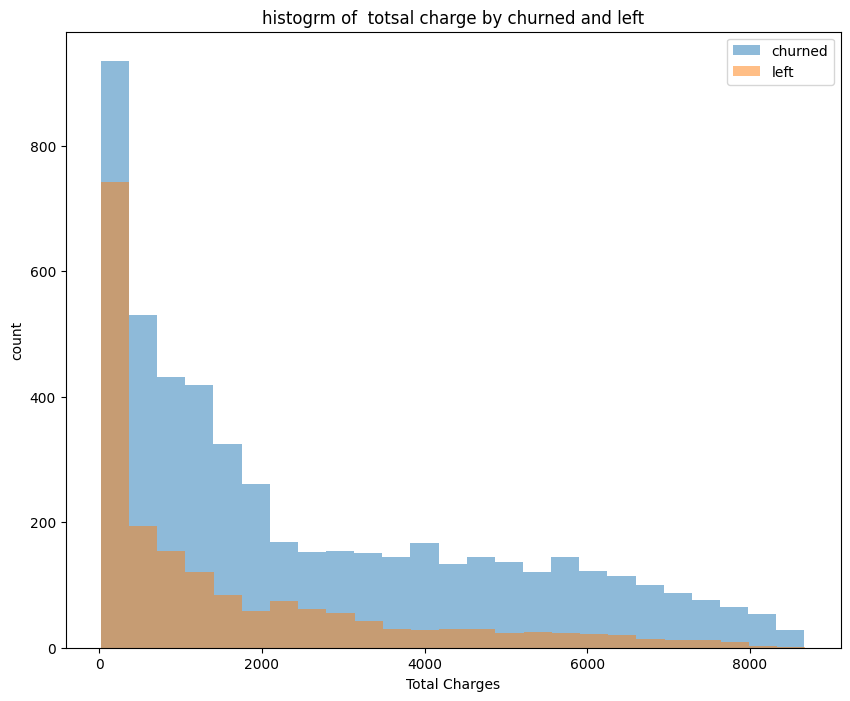

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.groupby('EndDate')['TotalCharges'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['churned', 'left'])
plt.title('histogrm of  totsal charge by churned and left')
plt.xlabel('Total Charges')
plt.ylabel('count')

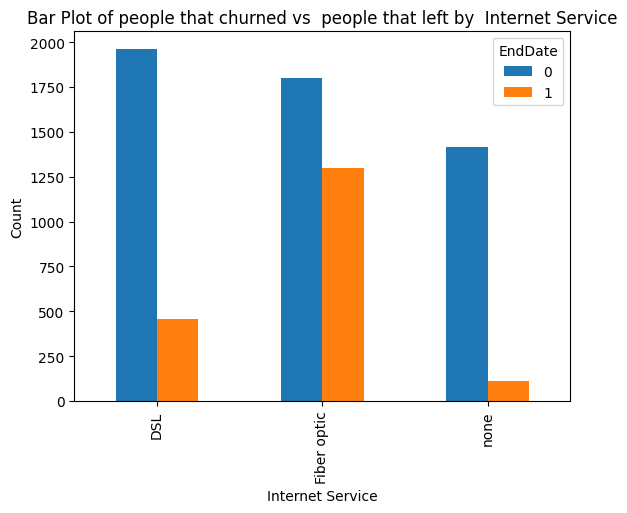

In [22]:
grouped = df.groupby('InternetService')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Internet Service')
plt.show()

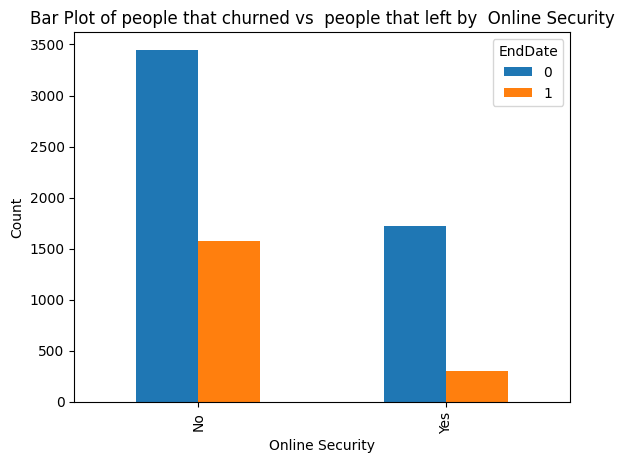

In [23]:
grouped = df.groupby('OnlineSecurity')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Online Security')
plt.show()

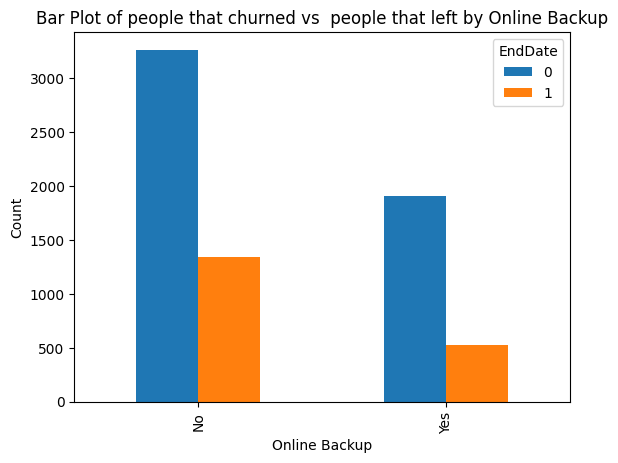

In [24]:
grouped = df.groupby('OnlineBackup')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by Online Backup')
plt.show()

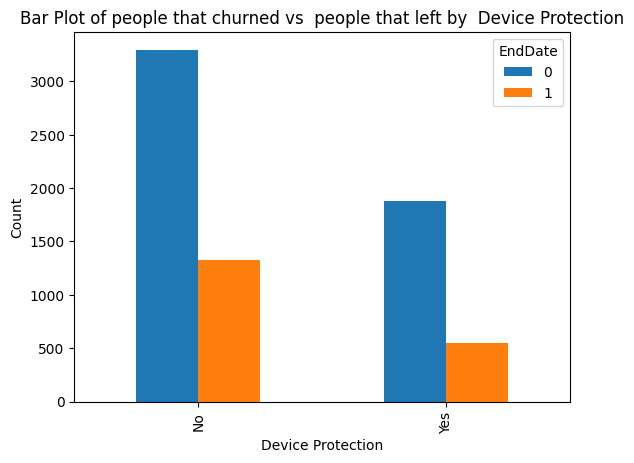

In [25]:
grouped = df.groupby('DeviceProtection')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Device Protection')
plt.show()

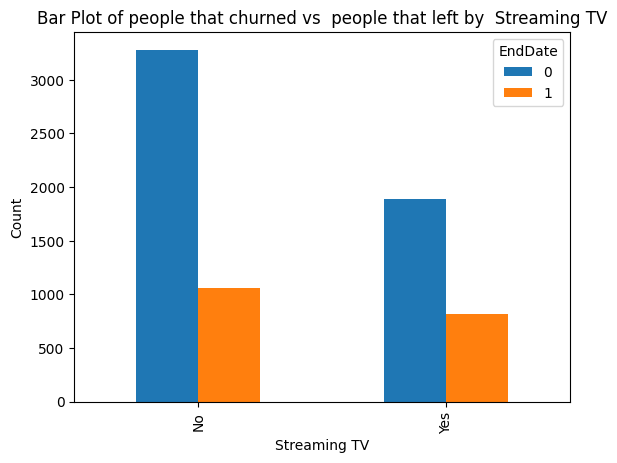

In [26]:
grouped = df.groupby('StreamingTV')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Streaming TV')
plt.show()

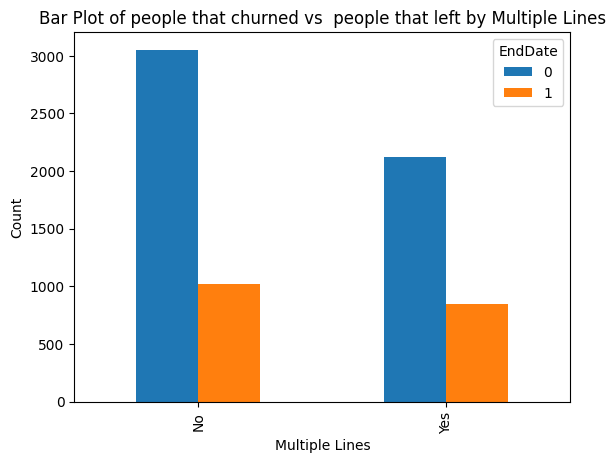

In [27]:
grouped = df.groupby('MultipleLines')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by Multiple Lines')
plt.show()

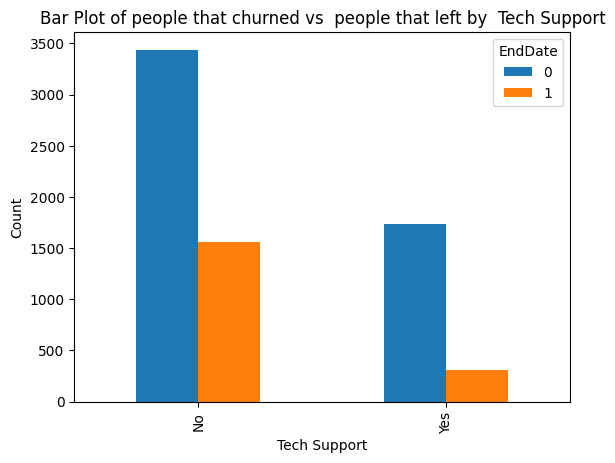

In [28]:
grouped = df.groupby('TechSupport')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Tech Support')
plt.show()

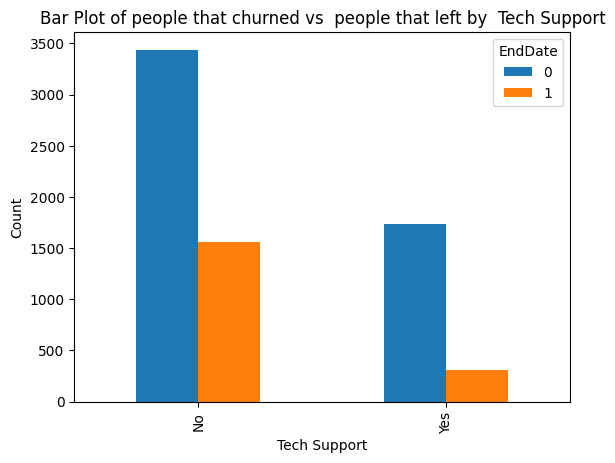

In [29]:
grouped = df.groupby('TechSupport')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Tech Support')
plt.show()

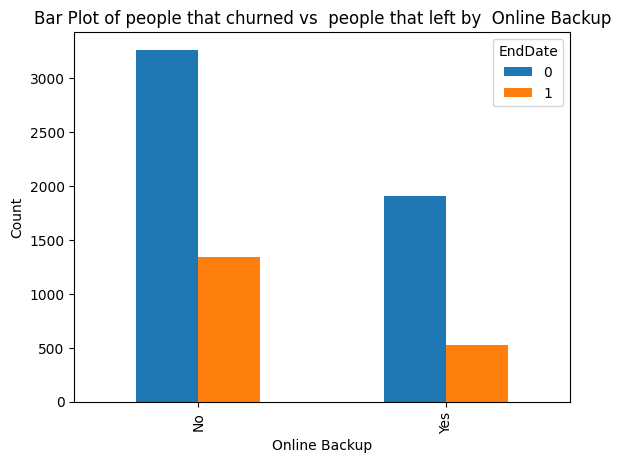

In [30]:
grouped = df.groupby('OnlineBackup')['EndDate'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.title('Bar Plot of people that churned vs  people that left by  Online Backup')
plt.show()

conclusions:looks like  more people seemed to churn based compared to leave based on most metrics.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It's almost always not a good idea to drop NaNs when you work with ML model. When you drop a row because of NaN in one column, you lose information from other columns which can be usefull for model traning. So, please, fill the NaNs instead of to drop them.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Fixed

</div>

In [31]:
# Initialize the OrdinalEncoder encode columns
encoder = OrdinalEncoder()
df['Type'] = encoder.fit_transform(df[['Type']])
df['PaperlessBilling'] = encoder.fit_transform(df[['PaperlessBilling']])
df['PaymentMethod'] = encoder.fit_transform(df[['PaymentMethod']])
df['InternetService'] = encoder.fit_transform(df[['InternetService']])
df['OnlineSecurity'] = encoder.fit_transform(df[['OnlineSecurity']])
df['OnlineBackup'] = encoder.fit_transform(df[['OnlineBackup']])
df['DeviceProtection'] = encoder.fit_transform(df[['DeviceProtection']])
df['TechSupport'] = encoder.fit_transform(df[['TechSupport']])
df['StreamingTV'] = encoder.fit_transform(df[['StreamingTV']])
df['StreamingMovies'] = encoder.fit_transform(df[['StreamingMovies']])
df['gender'] = encoder.fit_transform(df[['gender']])
df['SeniorCitizen'] = encoder.fit_transform(df[['SeniorCitizen']])
df['Partner'] = encoder.fit_transform(df[['Partner']])
df['Dependents'] = encoder.fit_transform(df[['Dependents']])
df['MultipleLines'] = encoder.fit_transform(df[['MultipleLines']])
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,month,day,year
0,7590-VHVEG,2020-01-01,0,0.0,1.0,2.0,29.85,29.85,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,2020
1,5575-GNVDE,2017-04-01,0,1.0,0.0,3.0,56.95,1889.50,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,1,2017
2,3668-QPYBK,2019-10-01,1,0.0,1.0,3.0,53.85,108.15,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,2019
3,7795-CFOCW,2016-05-01,0,1.0,0.0,0.0,42.30,1840.75,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1,2016
4,9237-HQITU,2019-09-01,1,0.0,1.0,2.0,70.70,151.65,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,1.0,1.0,3.0,84.80,1990.50,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2,1,2018
7039,2234-XADUH,2014-02-01,0,1.0,1.0,1.0,103.20,7362.90,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2,1,2014
7040,4801-JZAZL,2019-03-01,0,0.0,1.0,2.0,29.60,346.45,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,1,2019
7041,8361-LTMKD,2019-07-01,1,0.0,1.0,3.0,74.40,306.60,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,7,1,2019


In [32]:
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,month,day,year
0,7590-VHVEG,2020-01-01,0,0.0,1.0,2.0,29.85,29.85,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,2020
1,5575-GNVDE,2017-04-01,0,1.0,0.0,3.0,56.95,1889.50,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,1,2017
2,3668-QPYBK,2019-10-01,1,0.0,1.0,3.0,53.85,108.15,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,1,2019
3,7795-CFOCW,2016-05-01,0,1.0,0.0,0.0,42.30,1840.75,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,1,2016
4,9237-HQITU,2019-09-01,1,0.0,1.0,2.0,70.70,151.65,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,1.0,1.0,3.0,84.80,1990.50,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2,1,2018
7039,2234-XADUH,2014-02-01,0,1.0,1.0,1.0,103.20,7362.90,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2,1,2014
7040,4801-JZAZL,2019-03-01,0,0.0,1.0,2.0,29.60,346.45,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,1,2019
7041,8361-LTMKD,2019-07-01,1,0.0,1.0,3.0,74.40,306.60,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,7,1,2019


In [33]:
# get target an features.
X = df[['Type','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','MultipleLines','month','day','year']] 
y= df['EndDate']


In [34]:
df['TotalCharges' ] = df['TotalCharges'].fillna(0)
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
month               0
day                 0
year                0
dtype: int64

In [35]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['TotalCharges' ] = X_train['TotalCharges'].fillna(0)
X_test['TotalCharges' ] = X_test['TotalCharges'].fillna(0)

In [36]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.8572877741778547


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier
# Define parameter grid for tuning
params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(objective="binary:logistic", eval_metric="auc") 

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring="roc_auc", cv=5)
grid_search.fit(X_train, y_train) 

# Train the best model with tuned hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict_proba(X_test)[:, 1] 

# Evaluate AUC-ROC
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_score) 


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. Any encoder should be trained only on train data. If you retrain it on each data part, you can't be sure that encoding is the same on every data part
2. It's not a good idea to apply encoder to each column separately because you can apply it to all the necessary columns at once. It helps to reduce the amount of code.
3. LabelEncoder should be used only for target columns. For regular features you should use OrdinalEncoder
4. OrdinalEncoder is suitable for tree based models only. For any linear model you should use OneHotEncoder

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Points 2 and 3 are not fixed. But they not such crucial and so I can accept the work without them.

Based on your roc-auc score you achieved 5.0/6.0 sp. Well done! 

Good luck with your new job search!


</div>

<div class="alert alert-block alert-danger">
<b>Overall, this looks like a decent project, but this portion was supposed to just be the work plan. You will need to make small changes to the full code solution, but right now you need to write your work plan and respond to the tasks of this first part of the project.</b> <a class="tocSkip"></a>

Final Project: Work Plan

clarifying questions
1. which features are Important to inlude in the training data?
2.how should we merge dataframes?
3.which models should you use for best results?
4.how should you address the target column.
5. which users are more likely to leave vs churn?

plan
1. We will use all the featres in including BeginDate which will be split up into month day year column
2.We will merge all data together on the unique id.
3. encode the columns that need to be encoded.
4. we will test with a logistic regression model first
5.then to get a better accuracy try a gradiet booasting model.

<div class="alert alert-block alert-success">
<b>Comment V2:</b> 
    I will let this pass but I do recommend for your portfolio purposes writing this out a little better with some more detail. Also put this in a markdown cell, not a code cell. <br> <br>
    Answers to your questions:<br>
    1. The models can determine this, along with your own discrestion. <br>
    2. On customerID.<br>
    3. You need to determine this yourself, but you should try multiple model types.<br>
    4. If there is a value in the EndDate column, then we consider the customer churned. If there is a missing value with the EndDate, then the customer has not churned.<br>
    5. This is up to you to discover. Worth noting, "churning" is the same as a customer leaving.
    <a class="tocSkip"></a>